In [72]:
import mne
import os
from typing import *
%matplotlib qt
from mne.preprocessing import (
    ICA,
    create_eog_epochs,
    create_ecg_epochs,
    corrmap
)

In [33]:
def dist(p1: Point, p2: Point) -> float:
    if len(p1) != len(p2):
        raise ValueError(f'Dimensions of the points are inconsistent: {len(p1)} != {len(p2)}.')
    
    return math.sqrt(sum([(coord1 - coord2)**2 for coord1, coord2 in zip(p1.coordinates, p2.coordinates)]))

p1 = Point(0, 1)
p2 = Point(1, 0, 1)
dist(p1, p2)


ValueError: Dimensions of the points are not consistent. 2 != 3.

In [23]:
a = [1, 2, 3, 4]

a[2]

3

In [15]:
dist = math.sqrt((o.center_coords[0] - point[0])**2 + (o.center_coords[1] - point[1])**2)


AttributeError: 'Circle' object has no attribute 'a'

In [6]:
def foo(a, b, *args_foo):
    print(f'{a = }, {b = }')
    print(args_foo)

foo(1, '1', True)

a = 1, b = '1'
(True,)


In [ ]:

file = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\sub2\\raw\\Encoding1_tsss_mc_trans_annotated.fif'
raw = mne.io.read_raw_fif(file)

raw.load_data()


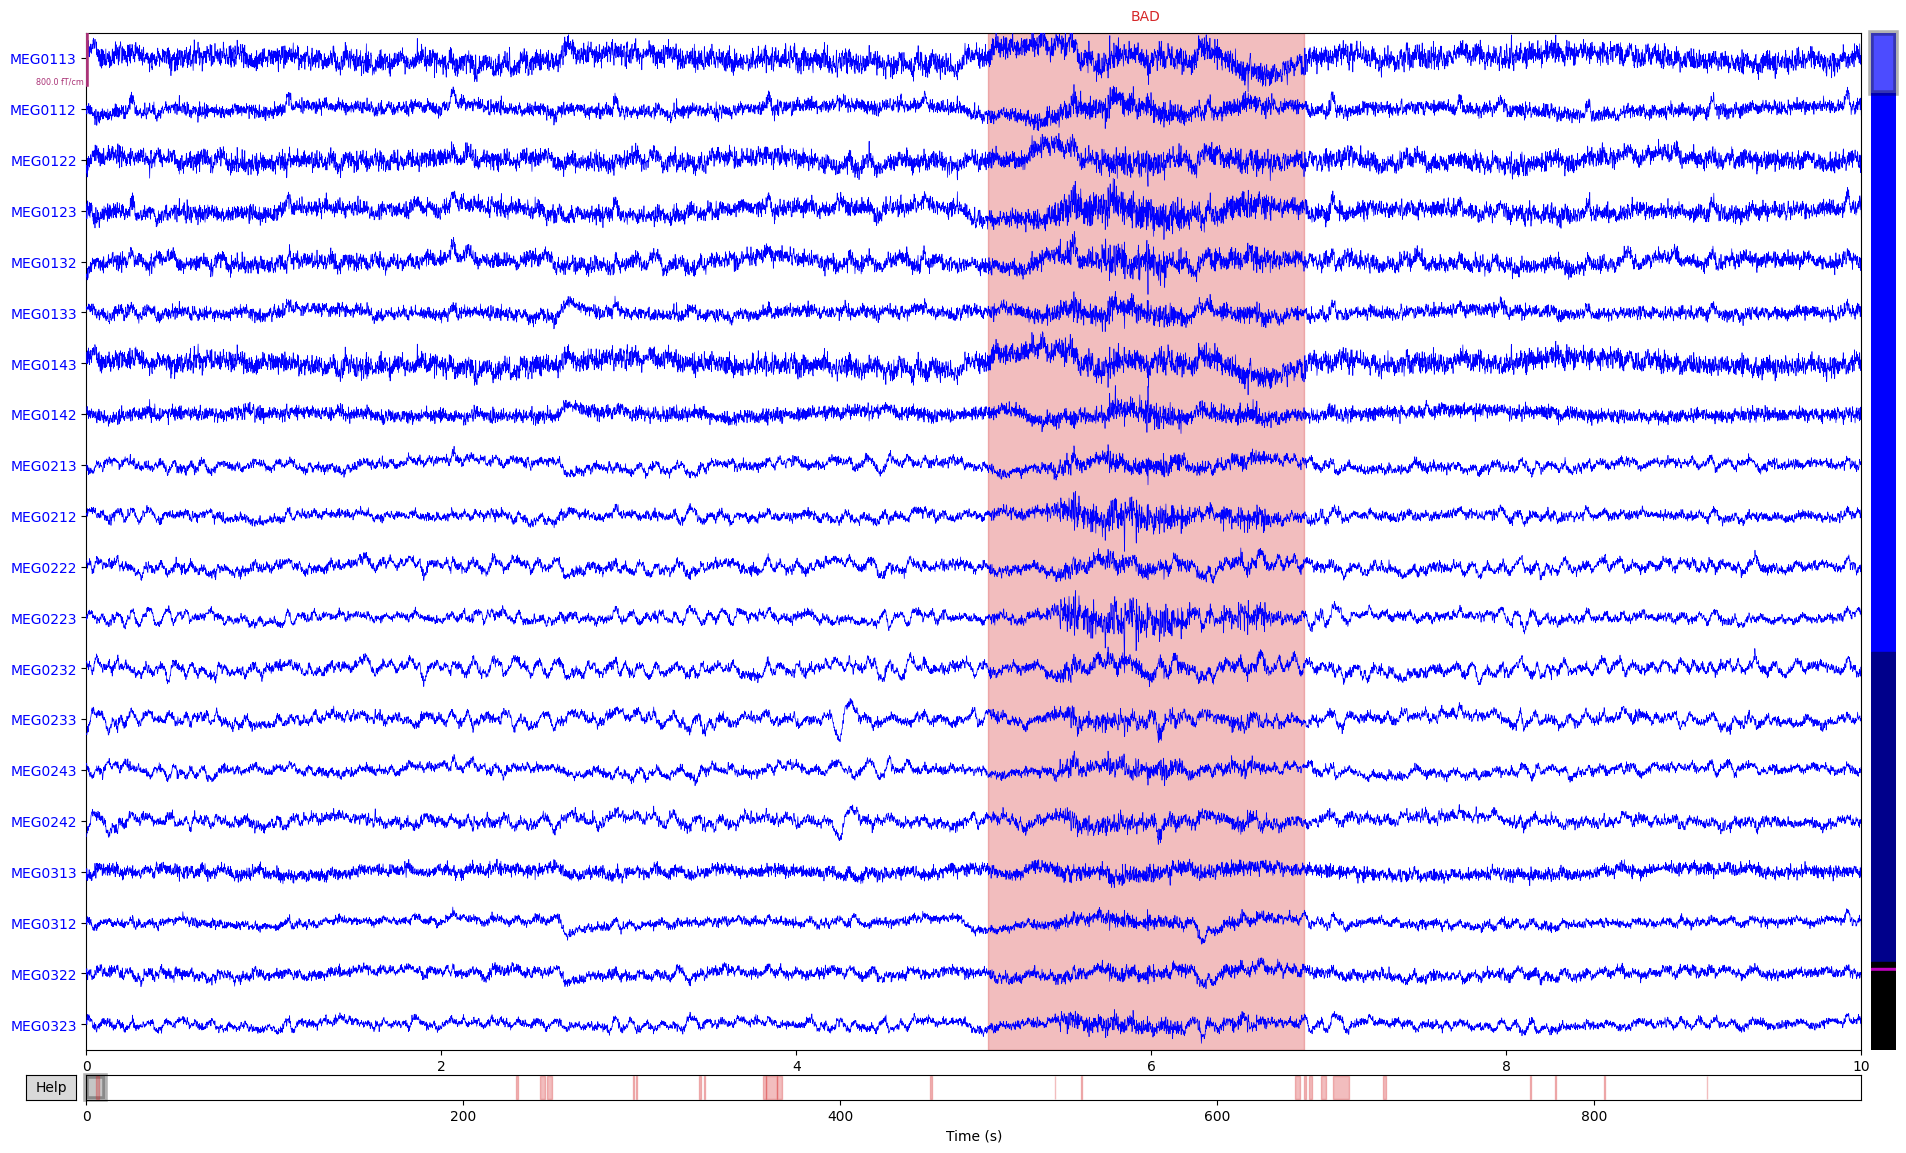

In [8]:
raw.plot()

In [7]:
high_filt_raw = raw.copy().filter(l_freq=.5, h_freq=None)

ica = ICA(n_components=20)
ica.fit(high_filt_raw)
ica

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.4s finished


Fitting ICA to data using 306 channels (please be patient, this may take a while)
Omitting 41898 of 942000 (4.45%) samples, retaining 900102 (95.55%) samples.
Selecting by number: 20 components
Fitting ICA took 63.0s.


Method,fastica
Fit,60 iterations on raw data (900102 samples)
ICA components,20
Explained variance,84.1 %
Available PCA components,306
Channel types,"mag, grad"
ICA components marked for exclusion,—


In [9]:
ica.exclude = []
# find which ICs match the ECG pattern
ecg_indices, ecg_scores = ica.find_bads_ecg(raw, ch_name='ECG063')
ecg_indices



Using threshold: 0.16 for CTPS ECG detection
Using channel ECG063 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 10000 samples (10.000 sec)

Number of ECG events detected : 1033 (average pulse 68 / min.)
Not setting metadata
1033 matching events found
No baseline correction applied
Using data from preloaded Raw for 1033 events and 1001 original time points ...
13 bad epochs dropped


[7]

In [16]:
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name=['EOG061', 'EOG062'])
eog_indices

Using EOG channels: EOG061, EOG062
Omitting 41898 of 942000 (4.45%) samples, retaining 900102 (95.55%) samples.
Omitting 41898 of 942000 (4.45%) samples, retaining 900102 (95.55%) samples.
Omitting 41898 of 942000 (4.45%) samples, retaining 900102 (95.55%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Omitting 41898 of 942000 (4.45%) samples, retaining 900102 (95.55%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[0]

Creating RawArray with float64 data, n_channels=23, n_times=942000
    Range : 75000 ... 1016999 =     75.000 ...  1016.999 secs
Ready.


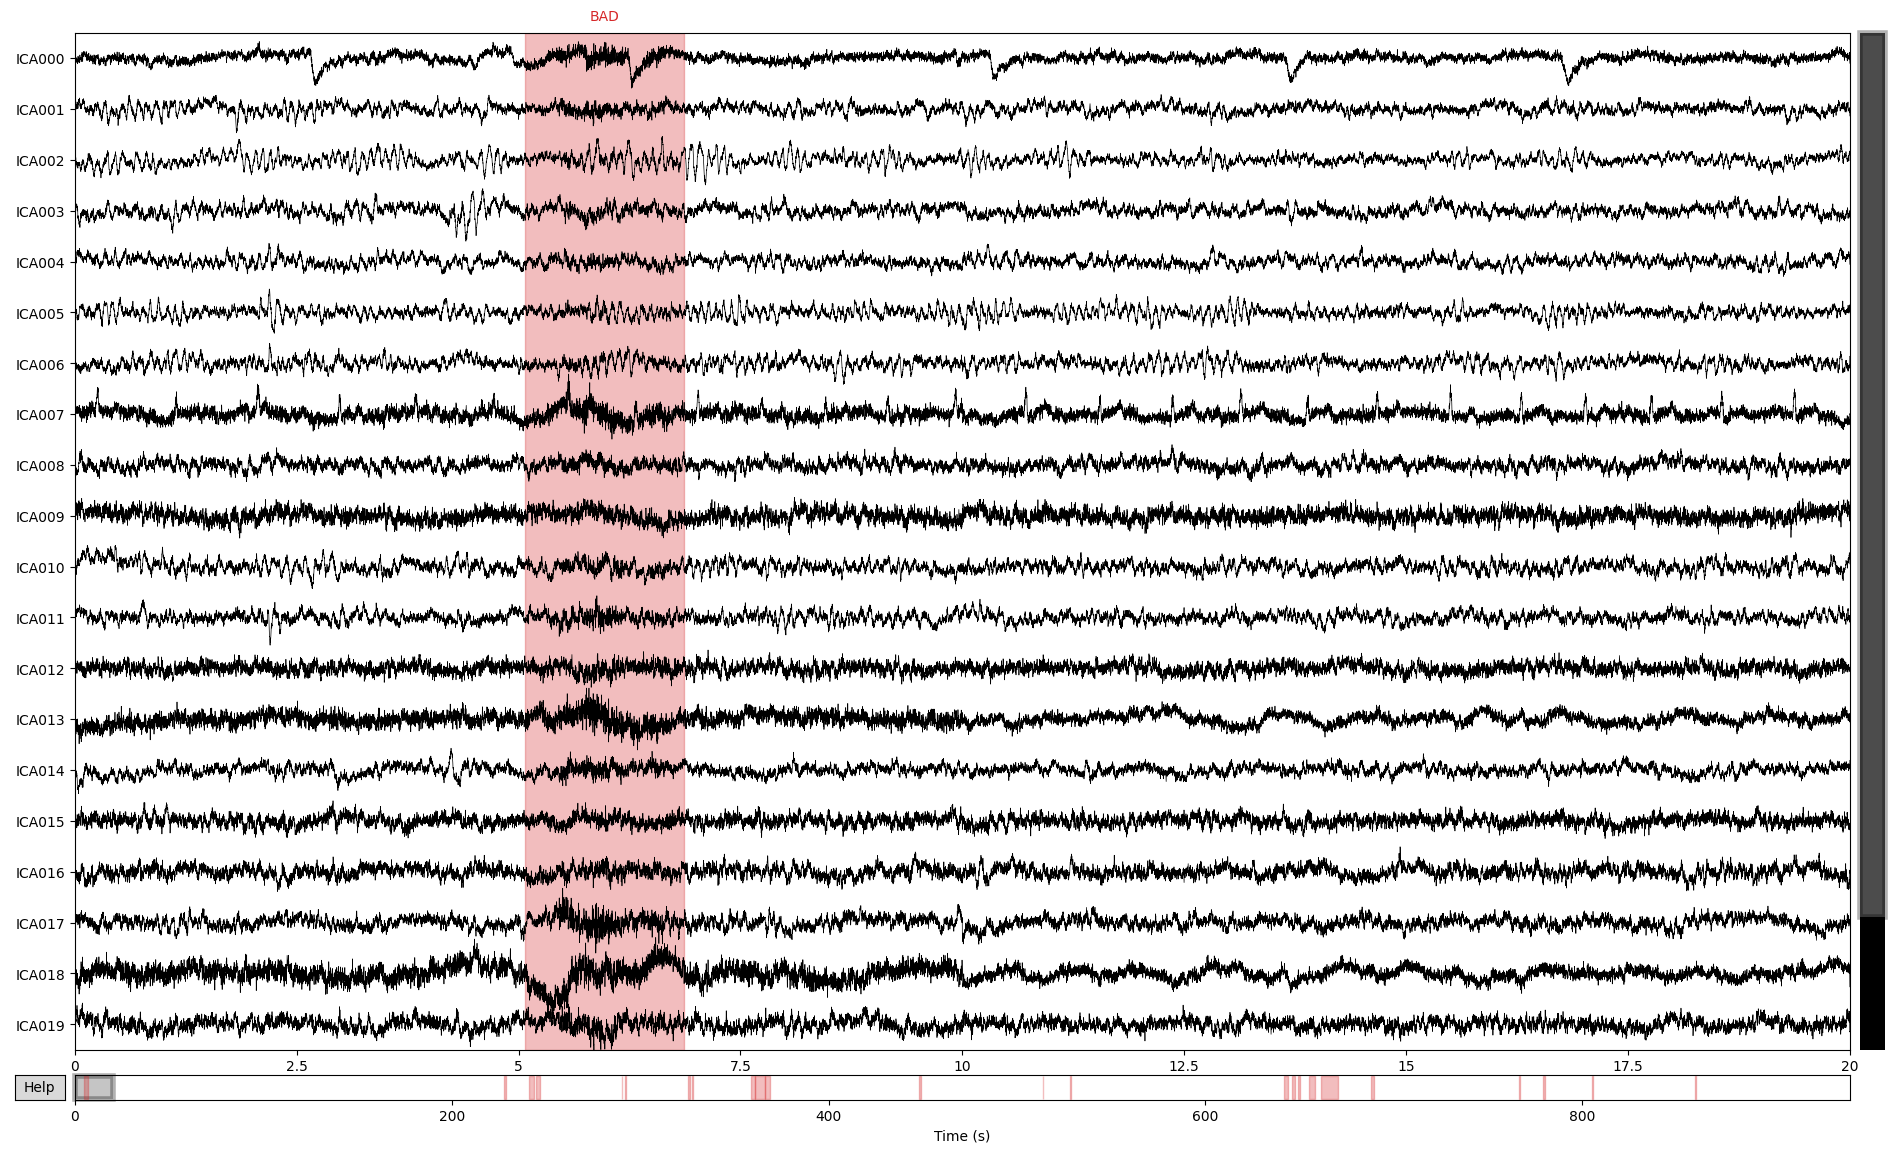

In [15]:
ica.plot_sources(high_filt_raw)

In [20]:
ica.exclude = eog_indices + ecg_indices

Channels marked as bad:
none


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 306 PCA components


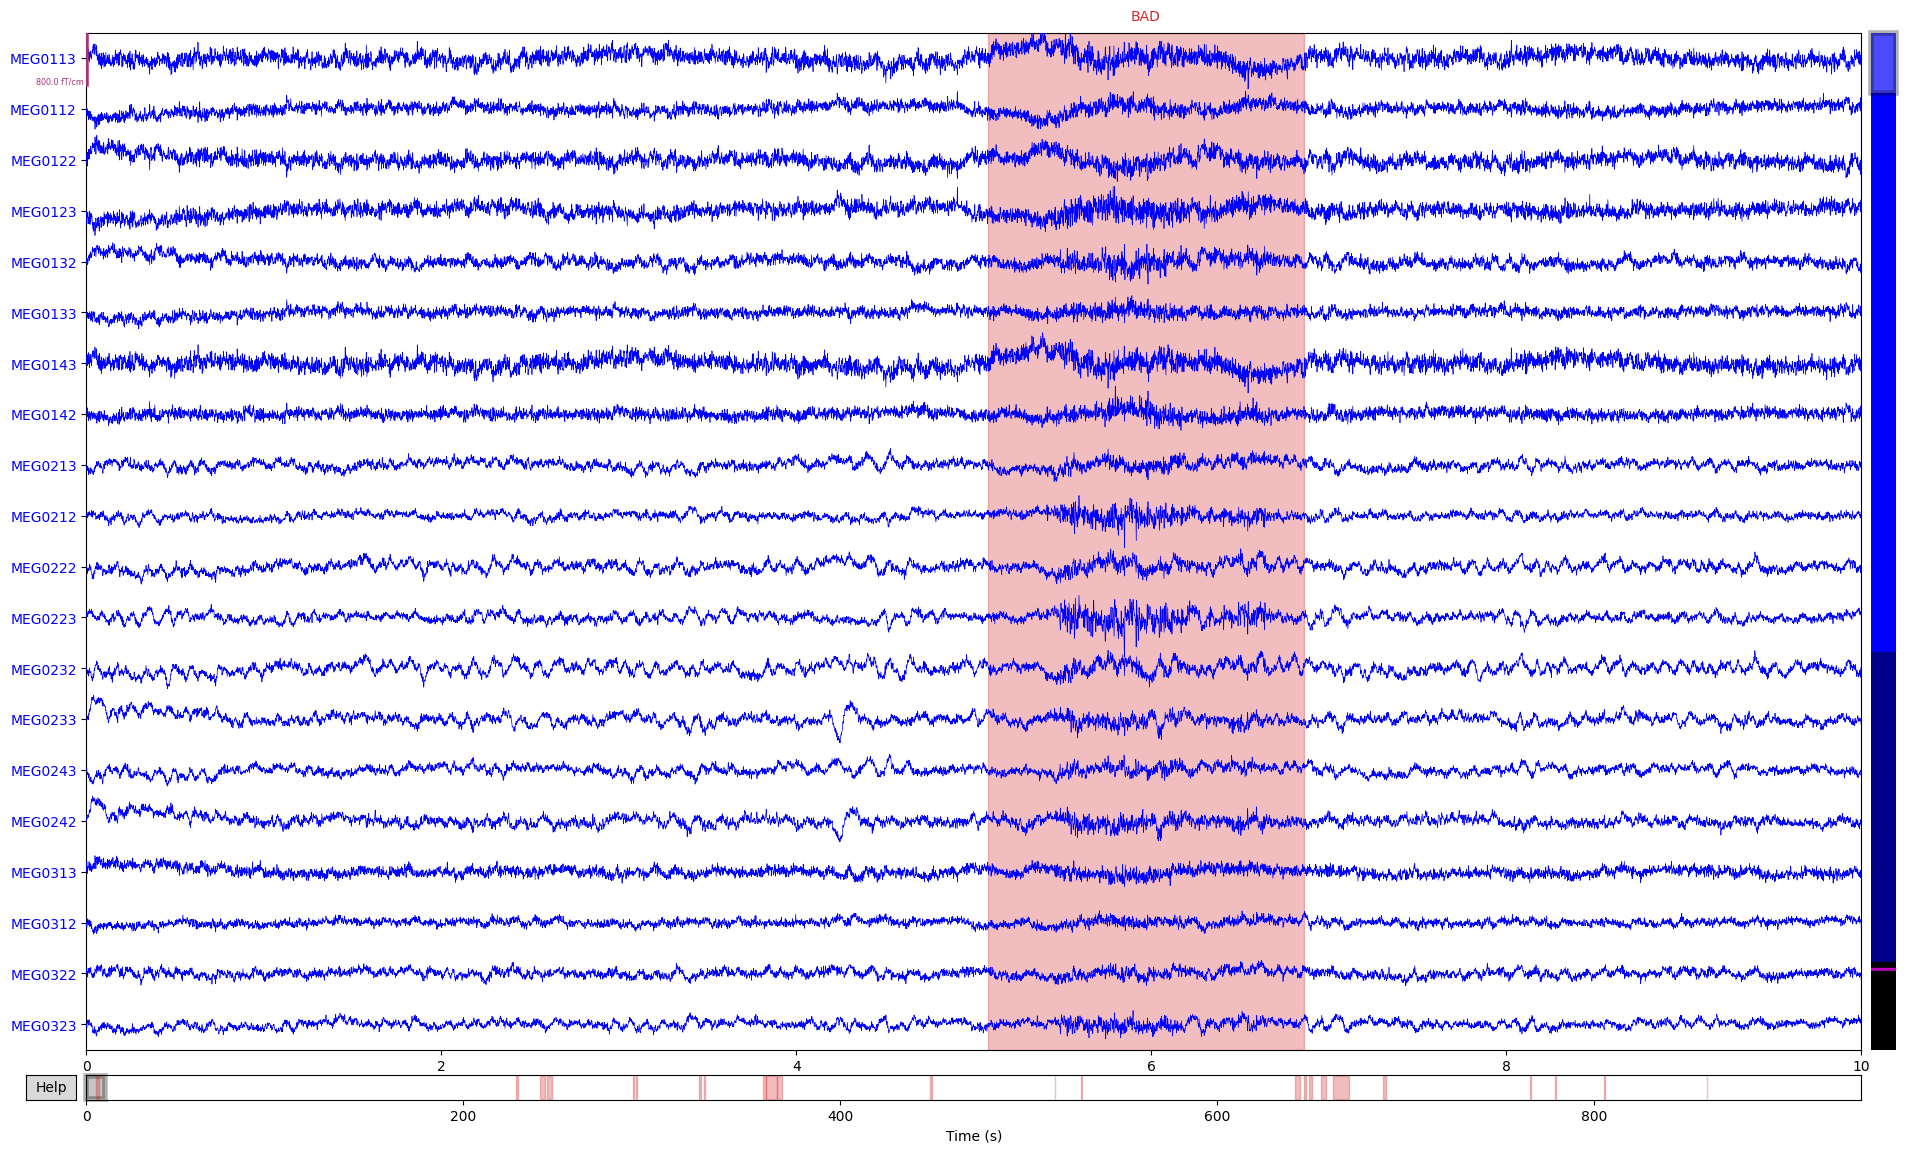

In [21]:
reconst_raw = high_filt_raw.copy()
ica.apply(reconst_raw)

reconst_raw.plot()

In [ ]:
reconst_raw.save('/path/to/Raw/raw_filtered_reconstructed.fif')
ica.save('/path/to/ICA/ica_some_informative_name.fif')

In [25]:
# ICA pipeline
import mne
import os
import logging
import argparse
%matplotlib qt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

if __name__ == '__main__': # if we import fuctions from another file, we dont read them straigh away, 
                            # but when we initiate them in this script
    mne.set_log_level(logging.CRITICAL)
    root = '..\\' # start from the folder with annotate.py

    parser = argparse.ArgumentParser(description='Script to address subjects')
    parser.add_argument('-from', type=int, help='id of the first subject', default=1)
    parser.add_argument('-to', type=int, help='id of the last subject', default=None)
    subjects_dir = os.path.join(root, 'data', 'subjects') # path to the subjects directory
    sub_inds = [int(subject.replace('sub', '')) for subject in os.listdir(subjects_dir)]

    from_,\
        to = vars(parser.parse_args()).values()
    if to is None:
        to = max(sub_inds)
    subjects_range = range(from_, to + 1)

    for sub_ind, subject_name in zip(sub_inds, os.listdir(subjects_dir)):
        if sub_ind not in subjects_range:
            continue
    
        # for subject_name in os.listdir(subjects_dir): # for every subj in the directory
        print(f'Subject name: {subject_name}')
        print('{0:64s}'.format(f'Reading {subject_name} folder...'), end='')
        subject_dir = os.path.join(subjects_dir, subject_name) # path to each subj one by one
        print('OK')
        ica_dir = os.path.join(subject_dir, 'ica_components')
        anno_raw_dir = os.path.join(subject_dir, 'raw') #path to raw file in subj directory
        print('{0:64s}'.format(f'Reading {anno_raw_dir} folder...'), end='')
        print('OK')
        for anno_raw_name in os.listdir(anno_raw_dir): #for each of raw enc files
            if not 'annotated' in anno_raw_name: #skip annotated files
                continue
            print(f'Raw file: {anno_raw_name}')
            
            encoding = anno_raw_name[:9] # give name to anno file enc 1 or 2 
            anno_raw_name = encoding + '_tsss_mc_trans_annotated.fif' # rest of the file name

            anno_raw_path = os.path.join(anno_raw_dir, anno_raw_name) # go to each raw file
            anno_raw = mne.io.read_raw_fif(anno_raw_path) # read raw file
            
            anno_raw.load_data() # load data to RAM

            high_filt_raw = anno_raw.copy().filter(l_freq=.5, h_freq=None) # high-pass filter data

            ica = ICA(n_components=20)
            ica.fit(high_filt_raw) #ica decomposition on raw filtered data
            ica

            ica.exclude = []
            # find which ICs match the ECG pattern
            ecg_indices, ecg_scores = ica.find_bads_ecg(anno_raw, ch_name='ECG063')
            ecg_indices
            # find which ICs match the EOG pattern
            eog_indices, eog_scores = ica.find_bads_eog(anno_raw, ch_name=['EOG061', 'EOG062'])
            eog_indices

            ica.plot_sources(high_filt_raw)

            ica.exclude = eog_indices + ecg_indices

            #create a copy of raw file and apply ica to it
            reconst_raw = high_filt_raw.copy()
            ica.apply(reconst_raw)
            reconst_raw.plot()

            # save new raw file and ica components file
            reconst_raw.save(anno_raw_path + '_filtered_reconstructed.fif', overwrite=True) # save with a name _annotated instead of _BAD
            ica.save(ica_dir + 'ica_components.fif')

usage: ipykernel_launcher.py [-h] [-from FROM] [-to TO]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9062 --control=9060 --hb=9059 --Session.signature_scheme="hmac-sha256" --Session.key=b"632b84b5-2f31-4986-b1eb-89b01e7a006e" --shell=9061 --transport="tcp" --iopub=9063 --f=c:\Users\CCDM\AppData\Roaming\jupyter\runtime\kernel-v2-9556lZzpjaXYPDx9.json


SystemExit: 2

d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\IPython\core\interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
